<a href="https://colab.research.google.com/github/VbsmRobotic/DL_ImageClassifier/blob/main/DeepLearning_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
from tensorflow import keras
from keras.constraints import max_norm
from keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.layers import Flatten
# from keras.constraints import max_norm
# from keras.optimizers import SGD

In [30]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()  # x is image and y is label

In [31]:
x_train.shape     # Number of Images, size ,RGB

(50000, 32, 32, 3)

In [32]:
y_train.shape     # Number of images and label

(50000, 1)

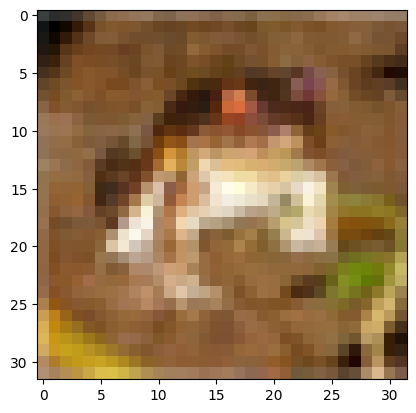

In [33]:
plt.imshow(x_train[0])

In [34]:
y_train[0]    # 0 airplane 1 automobile, 2 bird, 3 cat, 4 deer, 5 dog, 6 frog, 7 horse, 8 ship, 9 truck

array([6], dtype=uint8)

In [35]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255. If the number between 0-1 faster be trained.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [36]:
# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [37]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [38]:
class_num = y_train.shape[1]   # 10 class
class_num

10

In [39]:
x_train.shape[1:]

(32, 32, 3)

#**Building the Model**

In [44]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))  #Avoid Overfitting by offing the nerouns 20%
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# After applying multiple max pooling layers, we should flatten the output before passing it to the fully connected layers in a sequential neural network
model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))    # Avoid Overfitting OFF Neruons
model.add(BatchNormalization())

model.add(Dense(class_num, activation='softmax'))


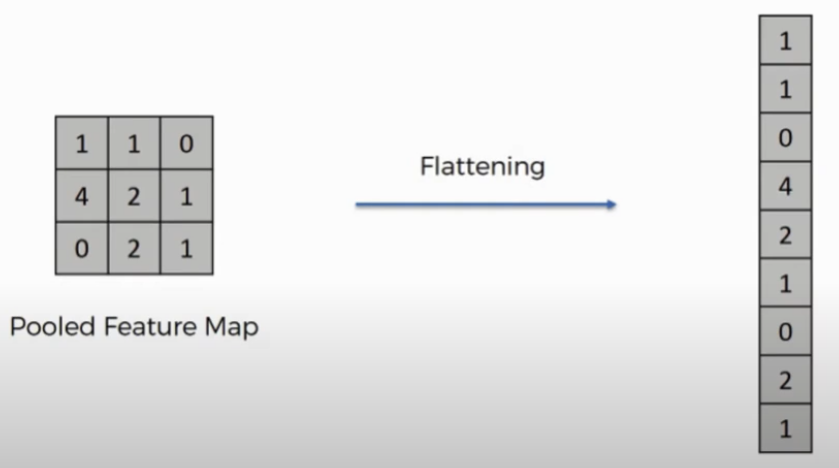

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   # if two class binary_cross

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 198,794 (776.54 KB)

 Trainable params: 197,962 (773.29 KB)

 Non-trainable params: 832 (3.25 KB)

###Trainging the model

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.3348 - loss: 1.9457 - val_accuracy: 0.5688 - val_loss: 1.2025
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5559 - loss: 1.2391 - val_accuracy: 0.6571 - val_loss: 0.9625
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6358 - loss: 1.0407 - val_accuracy: 0.7115 - val_loss: 0.8236
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6801 - loss: 0.9173 - val_accuracy: 0.7087 - val_loss: 0.8339
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7046 - loss: 0.8502 - val_accuracy: 0.7414 - val_loss: 0.7275
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7240 - loss: 0.7919 - val_accuracy: 0.7583 - val_loss: 0.7122
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7396 - loss: 0.7532 - val_accuracy: 0.7806 - val_loss: 0.6227
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7460 - loss: 0.7290 - val_accurac

In [ ]:
for key,val in history.history.items():
  print(key)

accuracy
loss
val_accuracy
val_loss


In [ ]:
import pandas as pd

<Axes: >

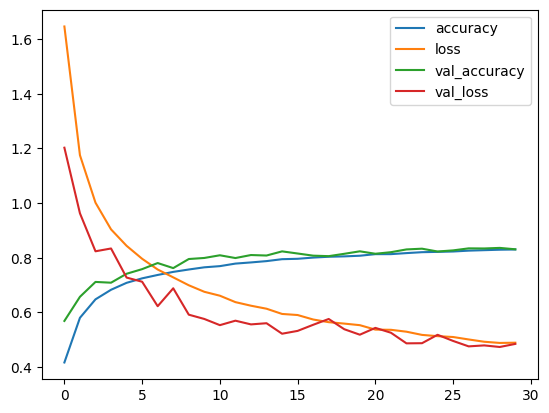

In [ ]:
pd.DataFrame(history.history).plot()

(0.5, 1.0)

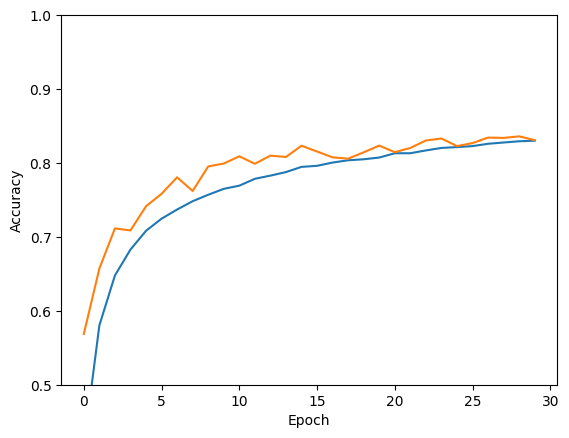

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])

In [ ]:
model.save('CNN_cifar10.h5')

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
model2 = load_model('CNN_cifar10.h5')

In [ ]:
model2.predict(x_test[0:10])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([2.6235593e-04, 8.8152796e-05, 9.1197035e-05, 8.7164766e-01,
       2.5593883e-05, 1.2647167e-01, 1.0939554e-03, 2.5681037e-04,
       4.9578473e-05, 1.2964301e-05], dtype=float32)

In [ ]:
labels[3]

'cat'

In [ ]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

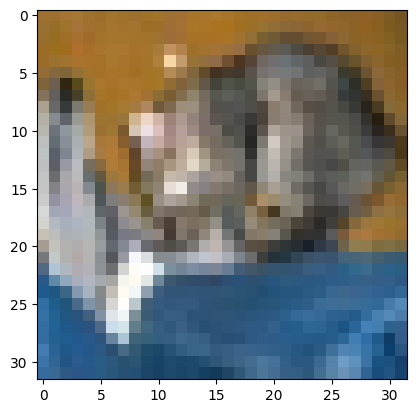

In [ ]:
plt.imshow(x_test[0])

# Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


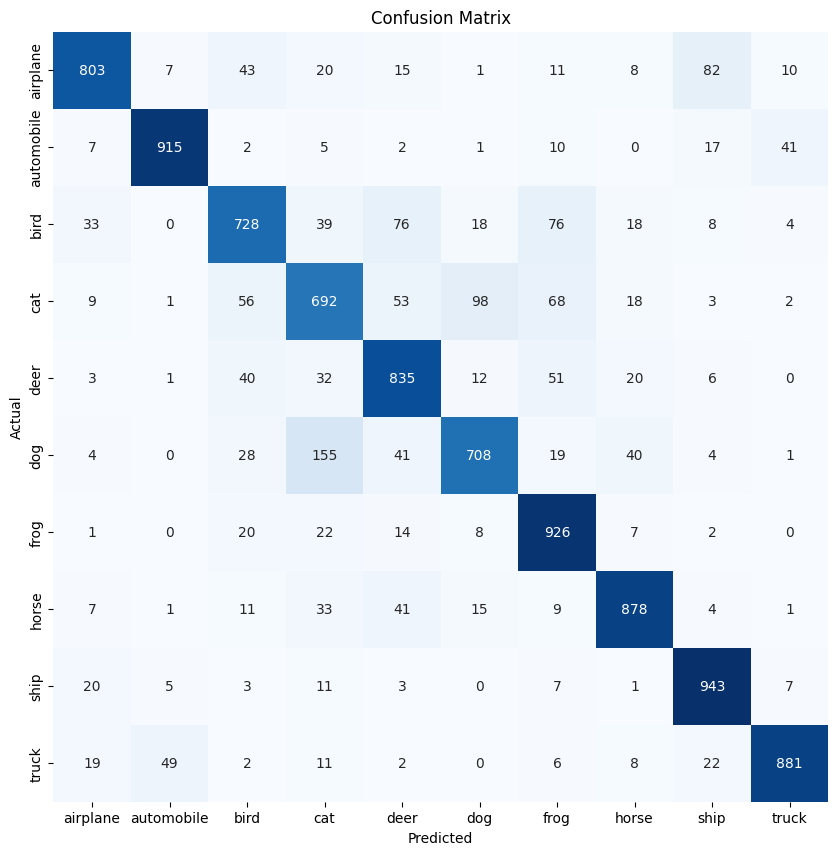

In [ ]:
# Predicting test data
predictions = model.predict(x_test)

predictions = np.argmax(predictions, axis=1)

# Import confusion_matrix and seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert y_test from one-hot encoded back to single labels
y_test_labels = np.argmax(y_test, axis=1)

# Creating confusion matrix
cm = confusion_matrix(y_test_labels, predictions)

# Plotting confusion matrix
plt.figure(figsize=(10, 10))
# Corrected the keyword arguments to xticklabels and yticklabels
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualization

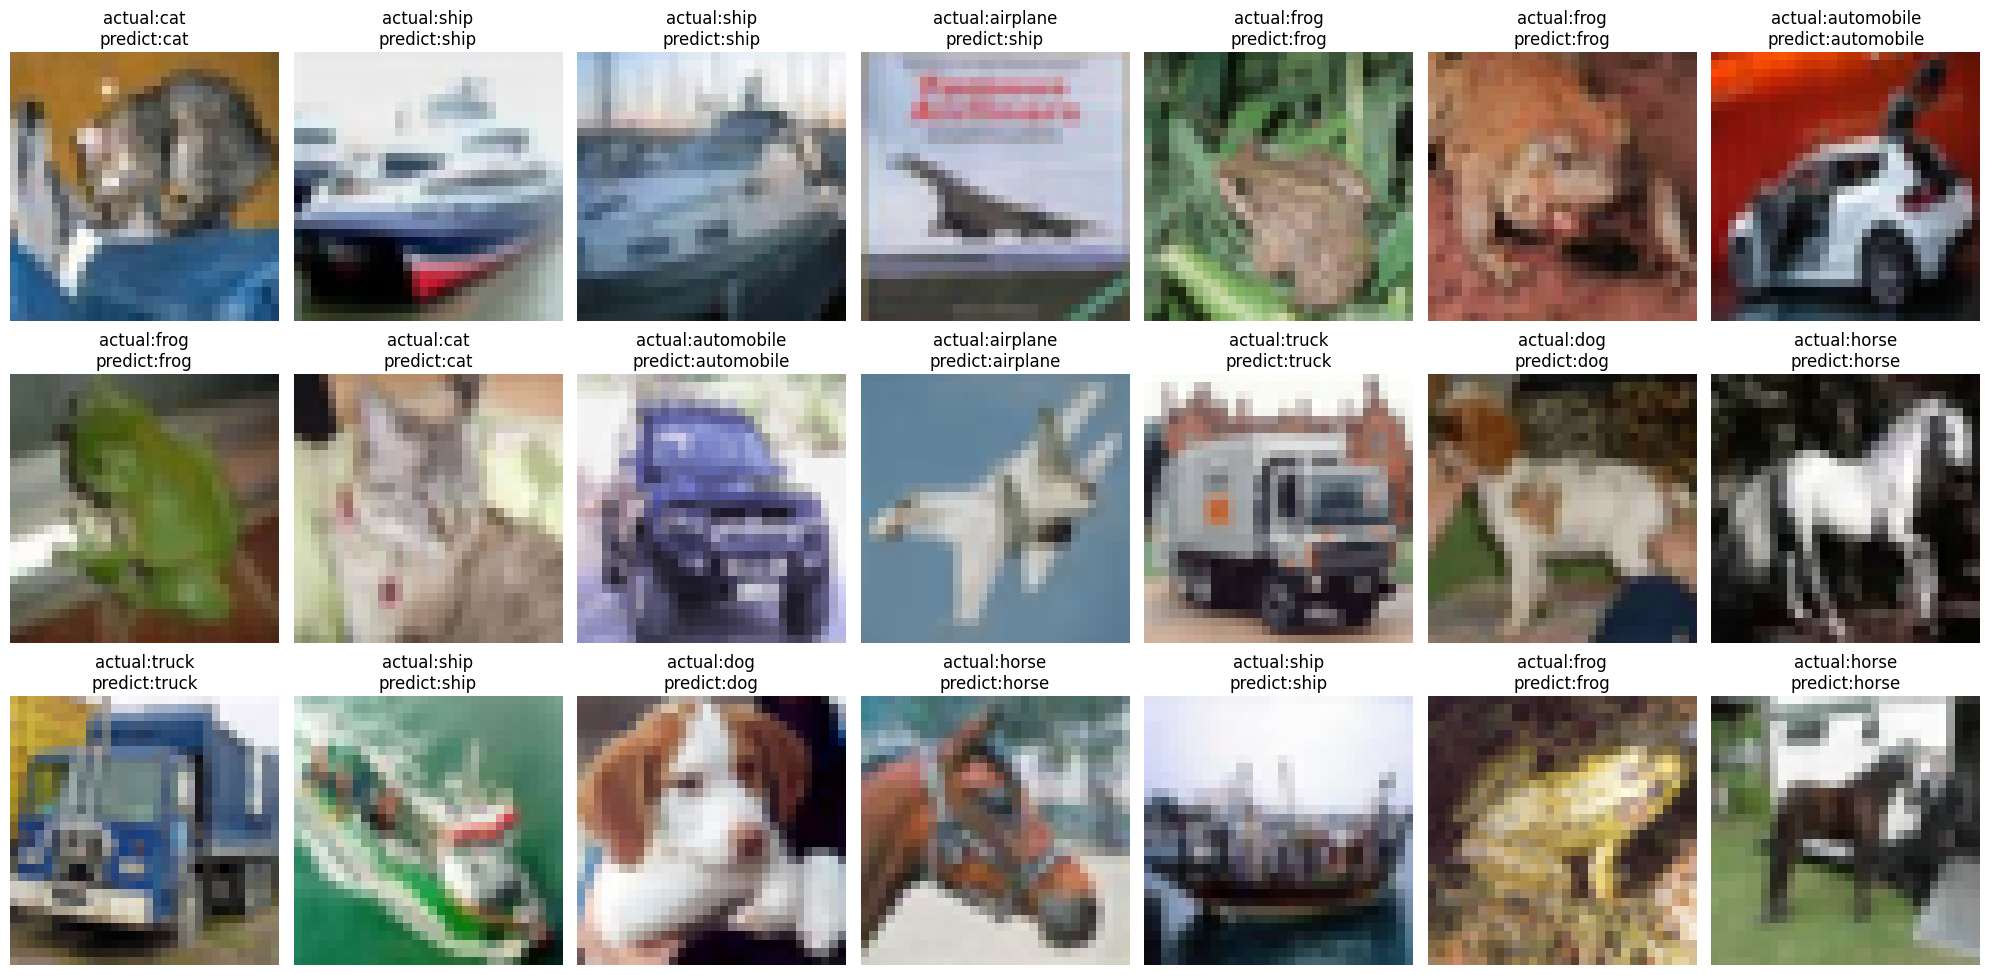

In [ ]:
y_test = y_test.astype('int')
predictions = predictions.astype('int')

# Convert y_test from one-hot encoded back to single labels
y_test_labels = np.argmax(y_test, axis=1)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False, sharey=True, figsize=(20, 10))
index = 0
# Iterate through the axes grid (3 rows, 7 columns)
for i in range(3):
  for j in range(7):
    # Ensure we don't go out of bounds of the test data
    if index < len(x_test):
        # Use y_test_labels for the actual label
        actual_label = labels[y_test_labels[index]]
        predicted_label = labels[predictions[index]]
        axes[i,j].set_title('actual:' + actual_label + '\n' + 'predict:' + predicted_label)
        # Assuming x_test is RGB (shape [height, width, 3]), imshow does not need cmap='gray'
        axes[i,j].imshow(x_test[index])
        axes[i,j].axis('off') # Turn off axes for cleaner image display
        index += 1
    else:
        # If we run out of test images, hide the remaining subplots
        fig.delaxes(axes[i,j])

plt.tight_layout()
plt.show()